# DeepLearning project with Tensorflow and MNIST

## Data Analysis

In [349]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors

In [350]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train set size:  60000  | test set size:  10000


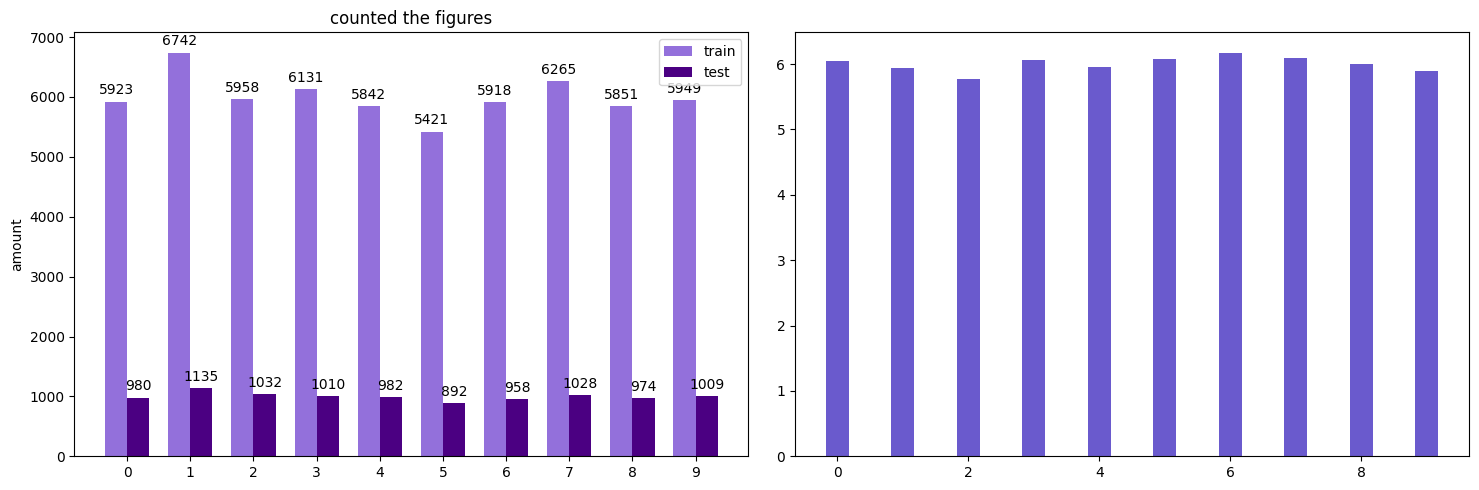

In [351]:
figure_train, count_train = np.unique(y_train, return_counts=True)
figure_test, count_test = np.unique(y_test, return_counts=True)
ratio = count_train/count_test
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
size_train = y_train.size
size_test = y_test.size
print("train set size: ", size_train, " | test set size: ", size_test)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(15, 5))
rects1 = ax[0].bar(x - width/2, count_train, width, label='train', color='mediumpurple')
rects2 = ax[0].bar(x + width/2, count_test, width, label='test', color='indigo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('amount')
ax[0].set_title('counted the figures')
ax[0].set_xticks(x, labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)

fig.tight_layout()

ax[1].bar(x, ratio, width, label='train', color='slateblue')

plt.show()

    Here you can see the distribution of the figures. They are not evenly distributed. In the training set (in blue) 1's are the most with 6742 and 5's are fewest with 5421. The test set is shown in orange. Let's have a loot at the ratios. To do so, the amount of train figures is divided by the amount of test figures.

You can see the ratios are around 6, like expected because there are 60000 train and 10000 test figures. The conclusion is that the distribution of the figure amounts of both sets are very similar.


 Plot of the first 25 samples in the MNIST training set


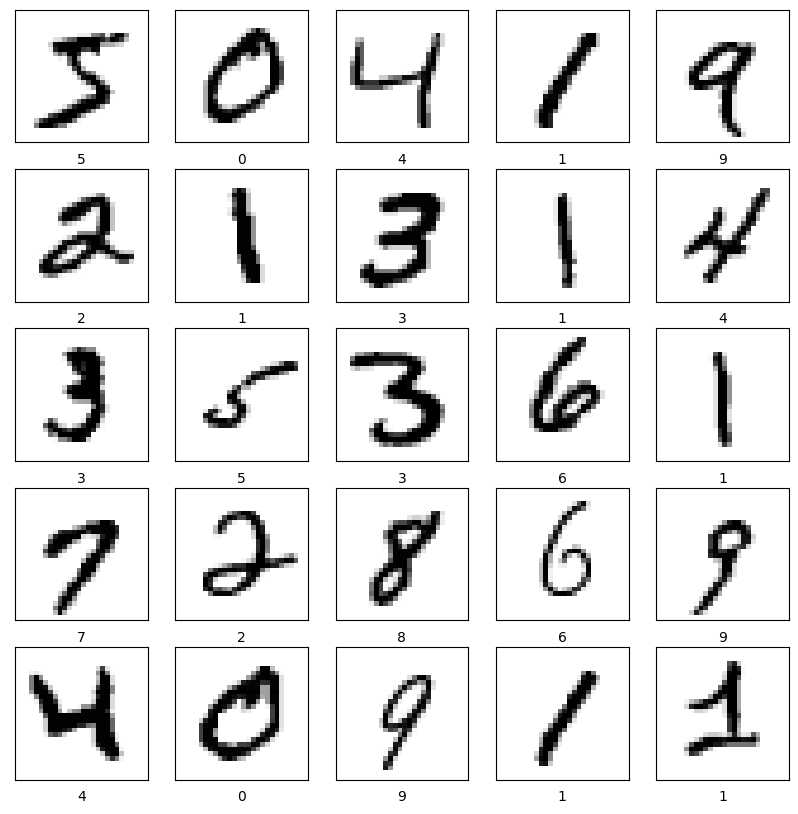

In [352]:
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Explainability


In [353]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test,y_test),
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.1091 - accuracy: 0.8375 - val_loss: 6.9976 - val_accuracy: 0.8714
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 6.2345 - accuracy: 0.8766 - val_loss: 5.7697 - val_accuracy: 0.8825
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.8144 - accuracy: 0.8808 - val_loss: 5.1382 - val_accuracy: 0.8936
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5357 - accuracy: 0.8832 - val_loss: 6.1070 - val_accuracy: 0.8798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3972 - accuracy: 0.8832 - val_loss: 5.2564 - val_accuracy: 0.8812
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2647 - accuracy: 0.8838 - val_loss: 6.9006 - val_accuracy: 0.8609
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2718 - accuracy: 0.8845 - val_loss: 5.7677 - val_accuracy

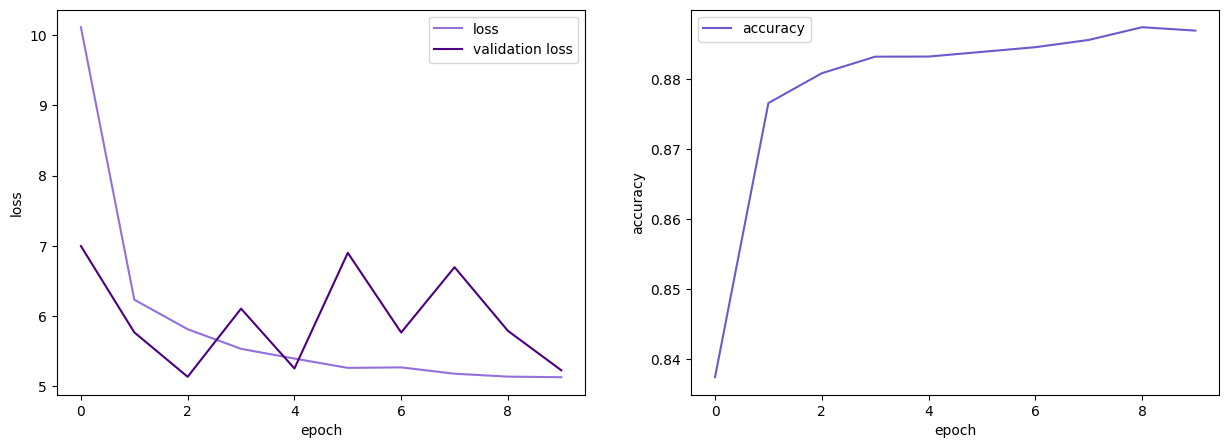

In [354]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].plot(history.history["loss"], color='mediumpurple')
axs[0].plot(history.history["val_loss"], color='indigo')
# axs[0].ylabel("loss")
# axs[0].xlabel("epoch")
# axs[0].title("model loss")
axs[0].legend(["loss", "validation loss"], loc="best")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')


axs[1].plot(history.history["accuracy"], color='slateblue')
# axs[1].xlabel("epoch")
# axs[1].title("model accuracy")
axs[1].legend(["accuracy"], loc="best")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')

plt.show()

## Performance